<a href="https://colab.research.google.com/github/Atharva-Waghmare/Deep_Learning/blob/main/parctice_deep_learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Loss:
23746.20703125

Training for 10 epochs...
23746.20703125
1038.41015625
721.9781494140625
662.095458984375
650.7596435546875
648.6105346679688
648.1997680664062
648.1177978515625
648.0982055664062
648.0904541015625

Final parameters: tensor([ 0.0998,  0.7070, -0.6820])
Final Loss: 648.0847778320312


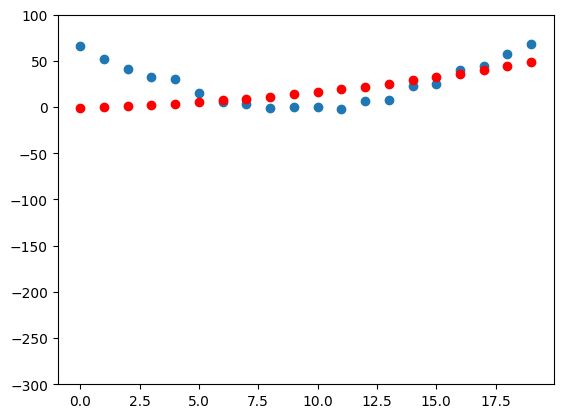

In [2]:
from fastai.data.all import *
from PIL import Image
import pandas as pd
import torch
from matplotlib import pyplot as plt

# A helper function to plot the model's predictions
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)
    plt.show()

# The quadratic function we want to model
def f(t, params):
    a, b, c = params
    return a * (t**2) + (b * t) + c

# The Mean Squared Error loss function
def mse(preds, targets):
    return ((preds - targets)**2).mean()

# Step 1: Initialize the parameters
time = torch.arange(0, 20).float()
speed = torch.randn(20) * 3 + 0.75 * (time - 9.5)**2 + 1
params = torch.randn(3).requires_grad_()

# Step 2: Calculate predictions and Step 3: Calculate the loss
preds = f(time, params)
loss = mse(preds, speed)

# Step 4: Calculate the gradients
loss.backward()

# Step 5: Step the weights (with a learning rate) and Step 6: Repeat the process
lr = 1e-5
def apply_step():
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    print(loss.item())

print("Initial Loss:")
print(loss.item())
print("\nTraining for 10 epochs...")

for i in range(10):
    apply_step()

# Step 7: Stop training
print("\nFinal parameters:", params.data)
final_preds = f(time, params)
final_loss = mse(final_preds, speed)
print("Final Loss:", final_loss.item())

# Visualize the final predictions
show_preds(f(time, params))